# Stabla odlučivanja 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

## Klasifikacija karcinoma 

Koristimo skup podataka [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).
Skup podataka se sastoji od 33 atributa. Vrednosti atributa su izračunati sa digitalizovanih slika mase, koje opisuju karakteristike ćelija prikazanih na slici. Vrednost atributa **diagnosis** sadrži informaciju o tome da li je u pitanju benigni ili maligni tumor.


## Učitavanje i analiza skupa podataka

In [2]:
data = pd.read_csv('data.csv')
data.columns # nazivi atributa

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Rad sa nedostajućim vrednostima
U skupu postoje nedostajuće vrednosti. Detaljnijom proverom po kolonama, vidimo da se one javljaju samo u koloni _Unnamed: 32_, kao i da su zapravo sve vrednosti u ovoj koloni NaN. Iz tog razloga smatramo da je ovo greška i kolonu izbacujemo iz skupa.

In [4]:
data.isna().any().any() # da li u skupu postoje nedostajuće vrednosti

True

In [5]:
data.isna().any() # u kojim kolonama se javljaju nedostajuće vrednosti

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [6]:
data['Unnamed: 32'].isna().all() # Sve vrednosti u koloni 'Unnamed: 32' su NaN

True

In [7]:
data.drop('Unnamed: 32', axis=1, inplace=True) # izbacujemo kolonu 'Unnamed: 32' iz skupa

In [8]:
data.drop('id', axis=1, inplace=True)

### Podela na ulazne i ciljne atribute
Informacija o vrsti tumora se nalazi u koloni _diagnosis_ (ciljni atribut), dok se ostali atributi koriste za predikciju (ulazni atributi).

In [9]:
Y = data['diagnosis']
X = data.drop('diagnosis', axis=1)
feature_names = X.columns
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Vrednosti u Y (klasa) je M - maligni i B - benigni tumor. Dakle, rešavamo problem _binarne klasifikacije_.

In [10]:
Y.unique()

array(['M', 'B'], dtype=object)

### Provera balansiranosti klasa

Na osnovu histograma vidimo da se u skupu podataka nalazi 212 instanci malignog i 357 instanci benignog tumora.
Primećujemo blagu nebalansiranost (38%-62%).

_NAPOMENA_: Na narednim časovima ćemo pokazati metode rada sa nebalansiranim klasama.

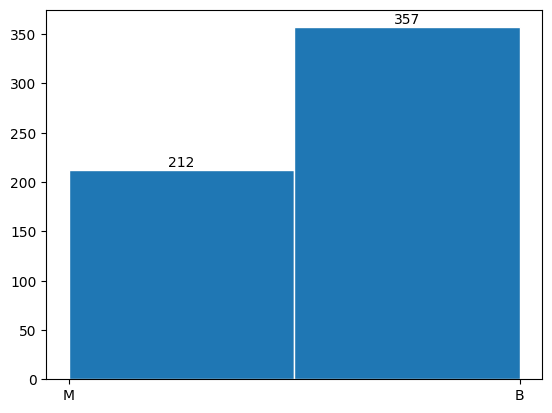

In [11]:
import numpy as np

freq, bins, _ = plt.hist(Y, edgecolor='white', bins=2)

bin_centers = np.diff(bins)*0.5 + bins[:-1] # računanje centra korpice

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             # poziciranje broja iznad korpice
               xytext = (0,0.2),             # odvajanje teksta od korpice
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )

plt.show()


Tipično, binarna klasifikacija sadrži jednu klasu koja predstavlja _normalno stanje_ i drugu koja predstavlja _abnormalno stanje_.
U našem primeru, benigni tumor predstavlja normalno stanje, a maligni abnormalno. 
Klasi koja predstavlja normalno stanje se dodeljuje oznaka **0**, dok se drugoj klasi dodeljuje oznaka **1**.

In [12]:
Y.replace("B", 0, inplace=True)
Y.replace("M", 1, inplace=True)

### Analiza ulaznih atributa

Na osnovu statistika kolona možemo primetiti da se vrednosti nalaze u različitim rasponima.

Pitanja na koja bi trebalo da odogovorimo su:
1. Da li je potrebno izvršiti normalizaciju prilikom korišćenja stabla odlučivanja? (Ne, zašto?)
2. Da li stablo odulučivanja robusno na autlajere? (Da, zašto?)

Dodatno pitanje: _Da li su isti odgovori i u situaciji kada bismo stablo odlučivanja koristili za rešavanje problema regresije?_

In [13]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Završili smo početnu analizu skupa podataka. Sada je potrebno da izvršimo _stratifikovanu_ podelu na **test i trening skup**, u razmeri 1:3.

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=41)

#### Pomoćne funkcije
Pošto ćemo trenirate više modela, pravimo pomoćne funkcije za pisanje izveštaja i vizuelizaciju stabala.

In [15]:
# !pip install termcolor
from sklearn.metrics import classification_report
from termcolor import colored

def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['B', 'M'], index=['B', 'M']))
    print("---------------------------------------------------------------------------------")
    

def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['B', 'M'], feature_names=feature_names, filled=True)
    plt.title("Decision tree of depth {} with {} nodes".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parameters of model {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")

    

## Stablo odlučivanja


In [16]:
dtc = DecisionTreeClassifier()

In [17]:
dtc.fit(X_train, Y_train) # treninranje modela

DecisionTreeClassifier()

Nakon treniranja modela sa default vrednostima hiper-parametara, dobijamo stablo dubine 10.

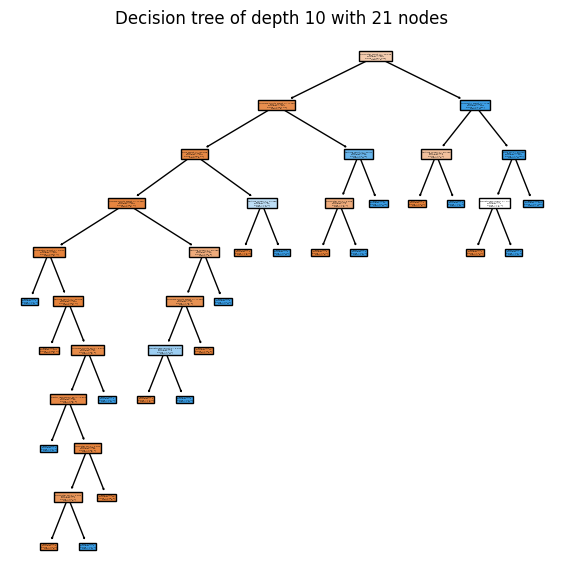

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [18]:
plot_decision_tree(dtc, feature_names)

Takođe, možemo prikazati i koji atributi su bili od najvećeg značaja prilikom formiranje stabla odlučivanja.
Zaključujemo da se prilikom klasifikacije veliki broj atributa ne koristi.

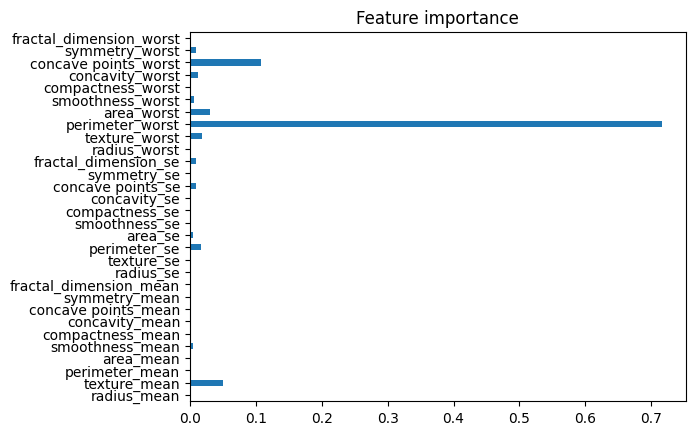

In [19]:
pd.Series(dtc.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

Model na trening skupu ima tačnost **1**.

Na osnovu ove vrednosti pretpostavljamo da je došlo do preprilagođavanja. Zato je potrebno proveriti koliko dobro naš model klasifikuje neviđene instance (test skup).

In [20]:
report(dtc, X_train, Y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
     B    M
B  267    0
M    0  159
---------------------------------------------------------------------------------


Izveštaj klasifikacije nad test skupom nam daje informaciju da je tačnost na test skupu **0,96**.

_Pitanje1_: Da li je došlo do preprilagođavanja?

_Pitanje2_: Koju vrstu grešaka u klasifikaciji želimo da minimizujemo? (Da li nam je bitnije da je FP ili FN malo?)


In [21]:
report(dtc, X_test, Y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        90
           1       0.91      0.94      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
    B   M
B  85   5
M   3  50
---------------------------------------------------------------------------------


Trenutni model, iako ima visoku preciznost, pravi veći broj grešaka prvog reda, i zato ćemo pokušati da ga unapredimo, promenom hiper-parametara.

## Podešavanje hiper-parametara modela

Hiper-paramtri su parametri koji se ne uče tokom treniranja. U scikit-learn biblioteci, hiper parametri se prosleđuju kao argumenti konstrukoru.

Želimo da promenimo hiper-parametre našeg modela, ali ne znamo koja kombinacija parametara će nam dati najbolji model.
Na primer, na osnovu analize prvog modela, zaključili smo da želimo da promenimo dva parametra:
**criterion**, **max_depth**.

#### Pogrešan pristup <span title="pickle" style="color: darkgreen ">🚩</span>
Ideja: Izaberemo jedan od ovih parametara npr dubinu stabla. Želimo da proverimo za dubine 2, 4, 6 i 8.
Treniramo 4 modela sa različitim dubinama i izaberemo najbolji?

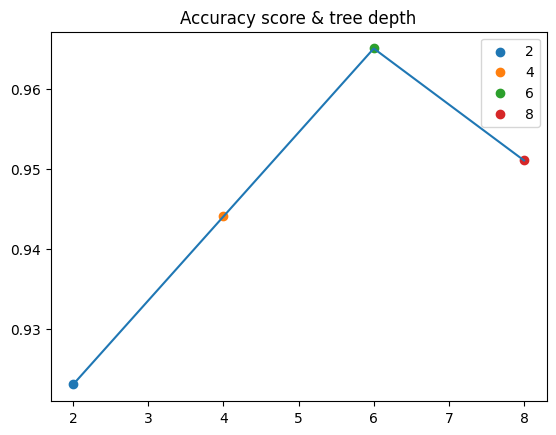

[0.9230769230769231, 0.9440559440559441, 0.965034965034965, 0.951048951048951]


In [22]:
from sklearn.metrics import accuracy_score
model_acc = []
depth_values = [2, 4, 6, 8]

for depth in depth_values:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, Y_train) # treniramo model
    y_pred = model.predict(X_test) #evaluiramo
    model_acc.append(accuracy_score(Y_test, y_pred))

#plt.plot(model_acc)
for d, acc in zip(depth_values, model_acc):
    plt.scatter(d, acc, label=d)
    
plt.plot(depth_values, model_acc)
plt.legend()
plt.title("Accuracy score & tree depth")
plt.show()
print(model_acc)

Zaključili smo na osnovu tačnosti da je dubina **6** najbolja. I prelazimo na naredni parametar - mera nečistoće - _gini_ ili _entropy_?

Ideja : Treniramo dva nova modela čija je maksimalna dubina 6, a imaju različite mere nečistoće...

In [23]:
model_acc_crit = []
for crit in ['gini', 'entropy']:
    model = DecisionTreeClassifier(max_depth=6, criterion=crit)
    model.fit(X_train, Y_train) # treniramo model
    y_pred = model.predict(X_test) #evaluiramo
    model_acc_crit.append(accuracy_score(Y_test, y_pred))
model_acc_crit

[0.965034965034965, 0.9300699300699301]

Zašto ovo nije ispravan pristup? **Kompromitovali smo test skupu - koristimo ga za izbor parametara modela!**

Ni pristup provere svih kombinacija nije dobar, iz istog razloga.

In [24]:
acc = []
for depth in depth_values:
    acc_crit = []
    for crit in ['gini', 'entropy']:
        model = DecisionTreeClassifier(max_depth=depth, criterion=crit)
        model.fit(X_train, Y_train) # treniramo model
        y_pred = model.predict(X_test) #evaluiramo
        acc_crit.append(accuracy_score(Y_test, y_pred))
    acc.append(acc_crit)
pd.DataFrame(acc, index =depth_values, columns=['gini', 'entropy'])

,gini,entropy
2,0.923077,0.895105
4,0.937063,0.895105
6,0.958042,0.937063
8,0.965035,0.951049


### Ispravan prisup - GridSearchCV  <span title="pickle" style="color: darkgreen "> ✔️ </span>

Iscrpna pretraga kombinacija prosleđenih vrednosti parametara. GridSearch koristi kros validaciju (cross-validation CV). Pored iscrpne pretrage, postoji i RandomSearchCV, koja se korisiti kada imate veliki broj kombinacija. Detaljnije pogledati u dokumentaciji.

U mapi čuvamo informaciju o imenima i vrednostima parametara koje želimo da ispitamo.

In [25]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,4,6, 8]
         }

In [26]:
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3) # Po defaultu je cv=5
#estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3, scoring = 'precision') 

In [27]:
estimator.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

Možemo pogledati koja je najbolja kombinacija parametara

In [28]:
estimator.best_params_

{'criterion': 'entropy', 'max_depth': 4}

Kao i najbolji score

In [29]:
estimator.best_score_

0.9225352112676056

In [30]:
report(estimator.best_estimator_, X_train, Y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       267
           1       1.00      0.89      0.94       159

    accuracy                           0.96       426
   macro avg       0.97      0.95      0.96       426
weighted avg       0.96      0.96      0.96       426

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
     B    M
B  267    0
M   17  142
---------------------------------------------------------------------------------


In [31]:
report(estimator.best_estimator_, X_test, Y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.92        90
           1       0.91      0.81      0.86        53

    accuracy                           0.90       143
   macro avg       0.91      0.88      0.89       143
weighted avg       0.90      0.90      0.90       143

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
    B   M
B  86   4
M  10  43
---------------------------------------------------------------------------------


_Pitanje 1_ : Koju meru GridSearchCV korisiti za odabir modela (šta je score)? 

_Pitanje 2_ : I dalje imamo više grešaka prvog reda... Kako bismo mogli da popravimo ovaj problem?

Takođe, možemo detaljnije pogledati i rezultate cross validacije.

In [32]:
estimator.cv_results_

{'mean_fit_time': array([0.0073328 , 0.00900022, 0.00999832, 0.00899982, 0.00866588,
        0.01009838, 0.01099976, 0.01000031]),
 'std_fit_time': array([0.00124751, 0.00081634, 0.00081693, 0.00081595, 0.00047278,
        0.00082903, 0.00081712, 0.00081653]),
 'mean_score_time': array([0.00366894, 0.00300097, 0.00266814, 0.004004  , 0.00266814,
        0.0029014 , 0.00233372, 0.00266727]),
 'std_score_time': array([9.43134083e-04, 1.91725700e-06, 4.72550476e-04, 8.17707766e-04,
        4.72215548e-04, 1.41503162e-04, 4.71651343e-04, 4.71257962e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 4, 6, 8, 2, 4, 6, 8],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
            

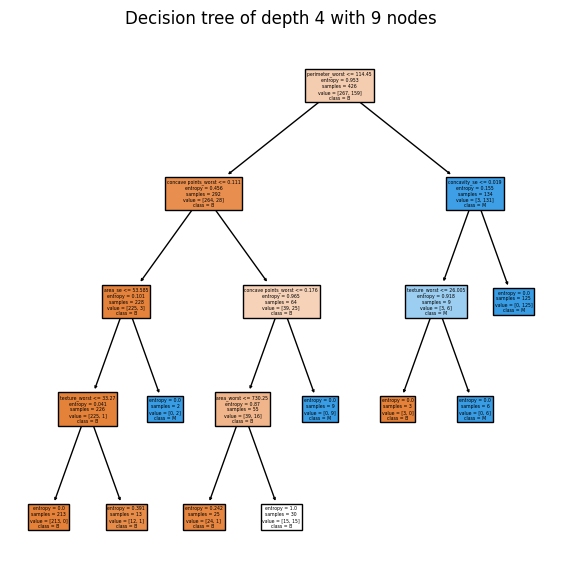

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion entropy
max_depth 4
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [33]:
plot_decision_tree(estimator.best_estimator_, feature_names)

## Slučajne šume
Jedan od najuspešnijih pristupa mašinskom učenju su ansambli (eng. ensemble) - skupovi većeg broja modela koji zajednički donose odluke.
Ključni ideja je da veći broj modela konstruistan na adekvatan način daje bolju preciznost od samo jednog modela.

Slučajna šuma se sastoji od _m_ stabala tretiranih na različitim podskupovima skupa za obučavanje.
* Jedno stablo se obučava na podskupu skupa za treniranje.
* Mogu se korisitit i podskupovi skupa atributa.
* Hiper-parametri : broj stabala (m) i veličina podskupa instanci i atributa.

Veće vrednosti za m su bolje - manja šansa za preprilagođavanje, ali je računski zahtevnije.
Takođe, gubimo interpretabilnost modela.

Primer: Imamo dva stabla odlučivanja
Detaljnije pogledajte, kako se modeli ponašaju odvojeno, a kakav je kvalitet ansambla...

Classification report for model RandomForestClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        90
           1       0.98      0.85      0.91        53

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on test data 
---------------------------------------------------------------------------------
    B   M
B  89   1
M   8  45
---------------------------------------------------------------------------------


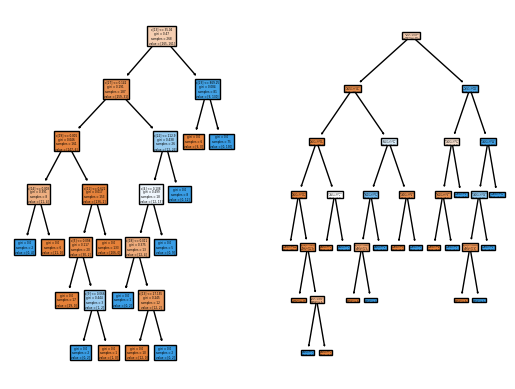

In [34]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=2)
random_forest.fit(X_train, Y_train)

report(random_forest, X_test, Y_test, "test")

for i in range(1, len(random_forest.estimators_) + 1):
    plt.subplot(1, 2, i)
    #report(random_forest.estimators_[i-1], X_test, Y_test)
    plot_tree(random_forest.estimators_[i-1], filled=True)
    

Pravimo slučajnu šumu koja se sastoji od 100 stabala odlučivanja

In [35]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, Y_train)

report(random_forest, X_train, Y_train)

report(random_forest, X_test, Y_test, "test")

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
     B    M
B  267    0
M    0  159
---------------------------------------------------------------------------------
Classification report for model RandomForestClassifier on test data
---------------------------------------------------------------------------------
              preci

## Poređenje dobijenih modela

Napravili smo više modela, sada je pitanje koji od njih najbolje rešava problem klasifikacije. Naravno, ne možemo zaključiti samo na osnovu preciznosti modela. 
Za poređenje koristimo **ROC krivu**.

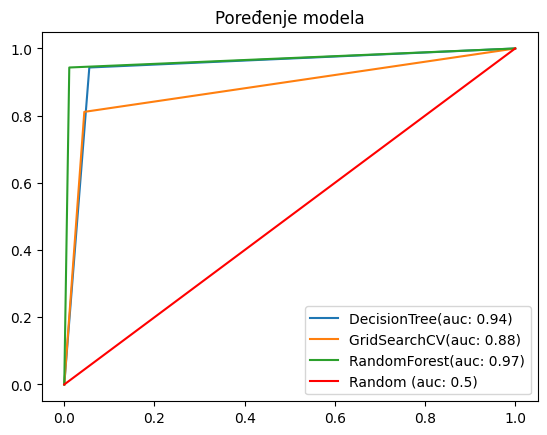

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [dtc, estimator.best_estimator_, random_forest]
model_names = ['DecisionTree', 'GridSearchCV', 'RandomForest']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()

Biramo model sa najvećom AUC vrednošću - **Random Forest**.

## Čuvanje i ponovno korišćenje modela <span title="pickle" style="color: darkgreen ">🥒</span>


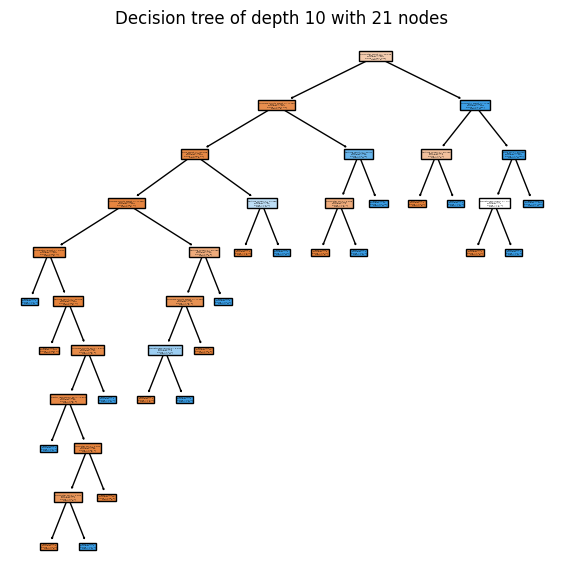

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [37]:
import pickle

with open('RandomTreeModel.pkl', 'wb') as file:  
    pickle.dump(dtc, file)

with open('RandomTreeModel.pkl', 'rb') as file:
    # Call load method to deserialze
    loaded_model = pickle.load(file)
plot_decision_tree(loaded_model, feature_names)

U slučaju korišćenja scikit-learn biblioteke, bolje je koristiti **joblib**, koja je efikasnija za objekte koji interno čuvaju velike numpy nizove (samo ako imate velike modele).

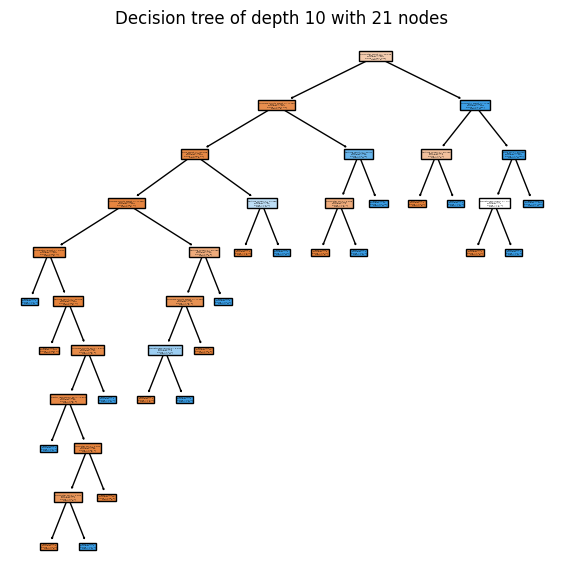

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [38]:
import joblib

with open('RandomTreeModel.pkl', 'wb') as file:  
    joblib.dump(dtc, file)

with open('RandomTreeModel.pkl', 'rb') as file:
    # Call load method to deserialze
    loaded_model = joblib.load(file)
plot_decision_tree(loaded_model, feature_names)

### Za vežbu:
* Pokušajte da poboljšate model finijim podešavanjem parametara
* Na početku smo naglasili da radimo sa blago nebalansiranim klasama, da li bi postavljanje parametra class_weight na "blanced" tokom treniranja poboljšalo model?